<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/211016_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## GitHub에서 데이터셋 가져오기



In [ ]:
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_train_dataset2.csv"
df = pd.read_csv(DATA_PATH)
df

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Mean Wind Speed (m/s),Mean Relative Humidity(%),Mosquito Value
0,2021-08-31,20.5,18.1,23.1,2.3,93.3,82.0
1,2021-08-30,24.2,21.2,27.7,1.4,77.5,82.6
2,2021-08-29,23.7,21.9,26.3,1.6,82.6,79.3
3,2021-08-28,23.6,19.7,28.2,1.8,80.4,83.0
4,2021-08-27,22.4,20.4,25.5,1.3,83.5,79.6
...,...,...,...,...,...,...,...
1006,2016-05-05,18.9,10.2,26.9,1.7,50.8,24.4
1007,2016-05-04,15.7,10.2,20.6,5.1,46.6,25.6
1008,2016-05-03,12.9,8.9,17.6,4.9,86.1,30.4
1009,2016-05-02,21.1,16.5,28.4,2.2,64.5,27.4


In [ ]:
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_test_dataset2.csv"
test = pd.read_csv(DATA_PATH)
test

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Mean Wind Speed (m/s),Mean Relative Humidity(%),Mosquito Value
0,2021-10-14,19.7,17.4,23.9,2.0,73.6,54.0
1,2021-10-13,19.6,14.9,25.2,2.4,66.6,43.2
2,2021-10-12,17.9,15.8,21.3,3.3,67.1,51.0
3,2021-10-11,15.2,12.6,17.8,2.2,78.6,63.1
4,2021-10-10,19.9,14.9,24.3,2.2,89.0,59.7
5,2021-10-09,20.9,18.5,24.1,2.3,83.5,61.1
6,2021-10-08,18.8,17.5,20.0,1.7,91.3,61.1
7,2021-10-07,19.4,17.9,21.9,1.9,85.5,73.9
8,2021-10-06,18.8,17.9,21.7,2.8,91.5,65.5
9,2021-10-05,23.6,21.7,26.5,3.3,82.4,58.4


In [ ]:
train=df.sample(frac=0.8)
val=df.sample(frac=0.2)

In [ ]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

val-=mean
val/=std

train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

val_data_set = val.values
x_val = val_data_set[:, 2:-1].astype(float)
y_val = val_data_set[:, -1].astype(float)

### 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 4, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [ ]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

### 모델 학습 + 학습과정 및 결과보기

In [ ]:
eph_size=150
hist=model.fit(x_train, y_train, epochs=eph_size, batch_size=4,validation_data=(x_val,y_val))

Epoch 1/150
203/203 [==============================] - 2s 10ms/step - loss: 0.7434 - mae: 0.6912 - val_loss: 0.5488 - val_mae: 0.5755
Epoch 2/150
203/203 [==============================] - 2s 9ms/step - loss: 0.6631 - mae: 0.6448 - val_loss: 0.5432 - val_mae: 0.5870
Epoch 3/150
203/203 [==============================] - 2s 9ms/step - loss: 0.6420 - mae: 0.6340 - val_loss: 0.5356 - val_mae: 0.5777
Epoch 4/150
203/203 [==============================] - 2s 9ms/step - loss: 0.6240 - mae: 0.6238 - val_loss: 0.4971 - val_mae: 0.5564
Epoch 5/150
203/203 [==============================] - 2s 9ms/step - loss: 0.6284 - mae: 0.6286 - val_loss: 0.5220 - val_mae: 0.5757
Epoch 6/150
203/203 [==============================] - 2s 9ms/step - loss: 0.6115 - mae: 0.6233 - val_loss: 0.5305 - val_mae: 0.5711
Epoch 7/150
203/203 [==============================] - 2s 9ms/step - loss: 0.6180 - mae: 0.6162 - val_loss: 0.4944 - val_mae: 0.5558
Epoch 8/150
203/203 [==============================] - 2s 10ms/step 

### mae와 val_mae 비교

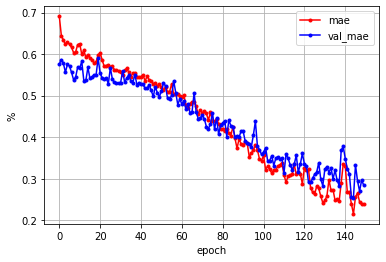

In [ ]:
import matplotlib.pyplot as plt

y_mae = hist.history['mae']
y_val_mae = hist.history['val_mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(eph_size)
plt.plot(x_len, y_mae, marker='.', c='red', label="mae")
plt.plot(x_len, y_val_mae, marker='.', c='blue', label="val_mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,100)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mse(loss)와 val_mse 비교

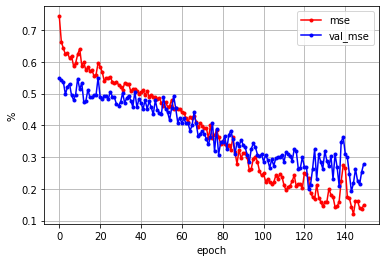

In [ ]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_val_mse = hist.history['val_loss']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(eph_size)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_val_mse, marker='.', c='blue', label="val_mse")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,100)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

In [ ]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.7433897852897644, 0.6631453037261963, 0.6419541239738464, 0.6239805221557617, 0.6284007430076599, 0.611518919467926, 0.617965579032898, 0.5864385962486267, 0.595658004283905, 0.6232634782791138, 0.6411646008491516, 0.5877729058265686, 0.5989922285079956, 0.5728436708450317, 0.5832173228263855, 0.571367621421814, 0.5731160640716553, 0.5554659962654114, 0.559500515460968, 0.5964493751525879, 0.5849814414978027, 0.5680630803108215, 0.5396019220352173, 0.5487261414527893, 0.5486049056053162, 0.5509887337684631, 0.5368157625198364, 0.5317009091377258, 0.5378527641296387, 0.5275763273239136, 0.5220507979393005, 0.5115020275115967, 0.5328324437141418, 0.5312288999557495, 0.5291366577148438, 0.5072278380393982, 0.5132691264152527, 0.5146039724349976, 0.5095235705375671, 0.4996989369392395, 0.5045361518859863, 0.5105919241905212, 0.4945131242275238, 0.5089844465255737, 0.4896538555622101, 0.49664685130119324, 0.4893375635147095, 0.4898996651172638, 0.4824146628379

### 모델 평가

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2/2 [==============================] - 0s 7ms/step - loss: 0.5286 - mae: 0.6047
## evaluation loss and_metrics ##
[0.528627872467041, 0.6047008633613586]


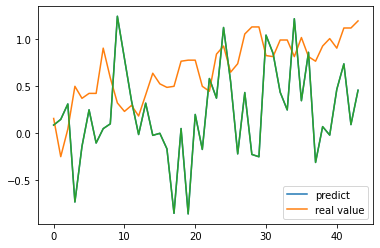

In [ ]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
plt.plot(model.predict(x_test))
# plt.plot(model.predict(x_test)-y_test)
#plt.xlim(0,20)
plt.legend()
plt.show()

In [ ]:
print(y_test)